In [2]:
import pandas as pd

# Ruta relativa al archivo que está en el nivel superior
file_path = "../phishing_train.xlsx"  
df_train = pd.read_excel(file_path)

# Mostrar las primeras filas para verificar que se cargó correctamente
print(df_train.head())


   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0         34            29           0   ca          100.000000   
1         25            18           0  org          100.000000   
2         71            24           0   es           34.626065   
3         30            23           0  com          100.000000   
4         27            18           0  com          100.000000   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              0.666667           0.010183     0.044248          2   
1              1.000000           0.079963     0.048271          3   
2              1.000000           0.006411     0.030641          2   
3              1.000000           0.522907     0.046835          3   
4              1.000000           0.522907     0.050666          3   

   NoOfSubDomain  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
0              3  ...    0       0                 1         47        7   
1              1  ...   

In [3]:
# 1. Información básica del DataFrame
print("Información básica del DataFrame:")
print(df_train.info())  # Información sobre tipos de datos y valores nulos


Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   100000 non-null  int64  
 1   DomainLength                100000 non-null  int64  
 2   IsDomainIP                  100000 non-null  int64  
 3   TLD                         100000 non-null  object 
 4   URLSimilarityIndex          100000 non-null  float64
 5   CharContinuationRate        100000 non-null  float64
 6   TLDLegitimateProb           100000 non-null  float64
 7   URLCharProb                 100000 non-null  float64
 8   TLDLength                   100000 non-null  int64  
 9   NoOfSubDomain               100000 non-null  int64  
 10  HasObfuscation              100000 non-null  int64  
 11  NoOfObfuscatedChar          100000 non-null  int64  
 12  ObfuscationRatio            100000 non-

In [4]:
# 2. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_train.describe())  # Estadísticas para variables numéricas



Estadísticas descriptivas:
           URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean       34.456400      21.464060       0.002520           78.392491   
std        39.462942       9.254954       0.050137           28.993152   
min        10.000000       1.000000       0.000000            0.304877   
25%        23.000000      16.000000       0.000000           56.895485   
50%        28.000000      20.000000       0.000000          100.000000   
75%        34.000000      25.000000       0.000000          100.000000   
max      4272.000000     103.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         100000.000000      100000.000000  100000.000000  100000.000000   
mean               0.845522           0.259652       0.041820       2.763010   
std                0.216843           0.251607       0.008651    

In [5]:
# 3. Verificar valores nulos
print("\nValores nulos por columna:")
print(df_train.isnull().sum())  # Conteo de valores nulos por columna



Valores nulos por columna:
URLLength                     0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavicon                    0
Robots                        0
IsResponsive

In [6]:
# 4. Distribución de la variable objetivo
print("\nDistribución de la variable objetivo ('label'):")
print(df_train['label'].value_counts(normalize=True) * 100)  # Distribución en porcentajes



Distribución de la variable objetivo ('label'):
1    57.153
0    42.847
Name: label, dtype: float64


C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\2928774445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='viridis')


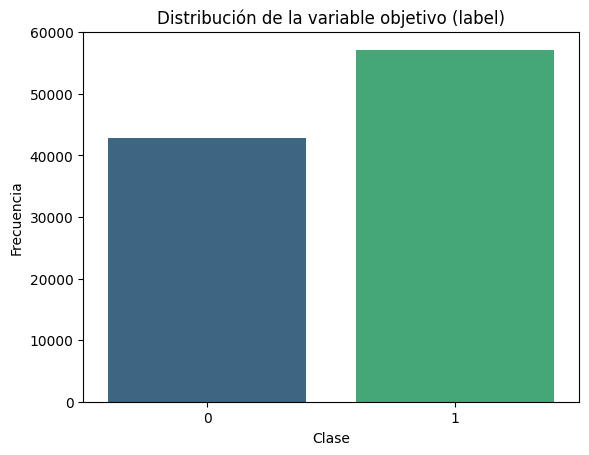

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualización de la distribución de la variable objetivo
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title("Distribución de la variable objetivo (label)")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\306895540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()



Matriz de correlación (variables numéricas):
                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.249870    0.269500   
DomainLength                 0.249870      1.000000   -0.038059   
IsDomainIP                   0.269500     -0.038059    1.000000   
URLSimilarityIndex          -0.432939     -0.419048   -0.116413   
CharContinuationRate        -0.247752     -0.576162   -0.097295   
TLDLegitimateProb           -0.013024      0.026968   -0.051030   
URLCharProb                 -0.249240     -0.177264   -0.106063   
TLDLength                    0.039770      0.152241   -0.012458   
NoOfSubDomain                0.069859      0.397806    0.084768   
HasObfuscation               0.186701      0.040092    0.002083   
NoOfObfuscatedChar           0.561897      0.010859    0.000518   
ObfuscationRatio             0.148707      0.022071    0.001594   
NoOfLettersInURL             0.944336      0.305797    0.254811   
LetterRatioInURL

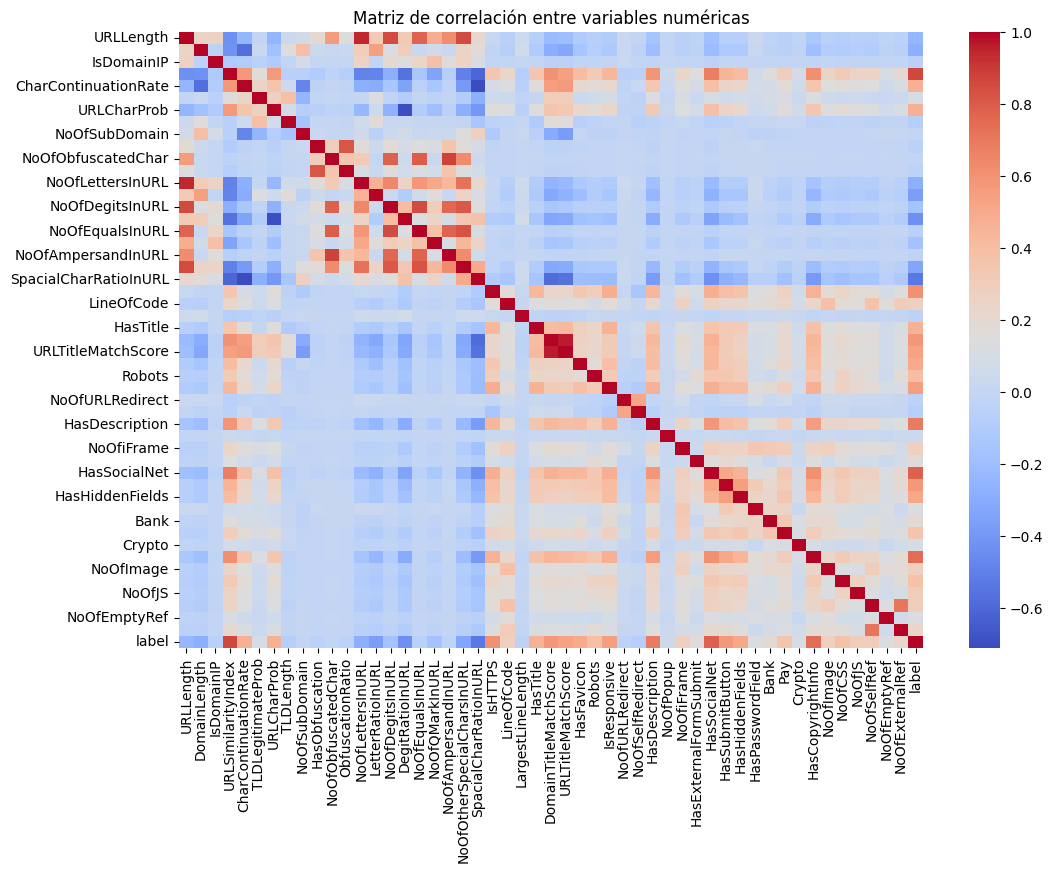

In [8]:
# 5. Correlación entre variables numéricas
correlation_matrix = df_train.corr()
print("\nMatriz de correlación (variables numéricas):")
print(correlation_matrix)
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


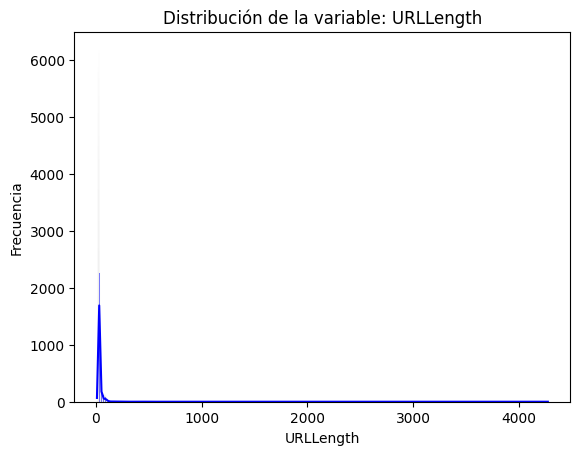

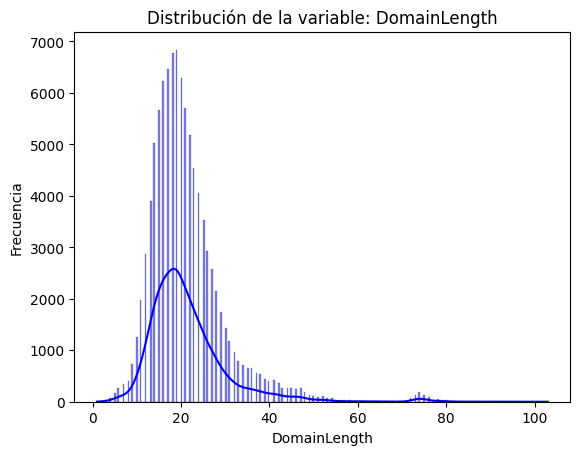

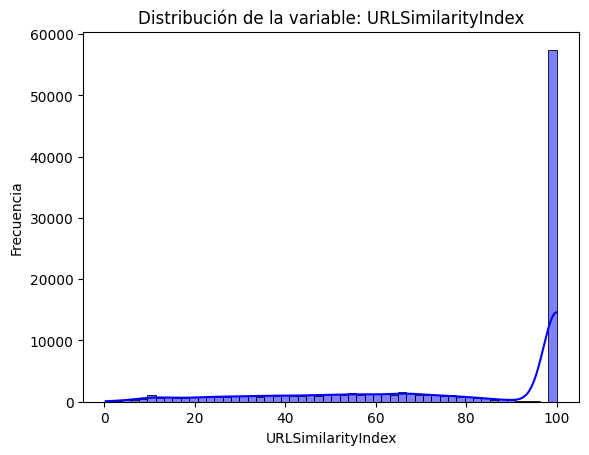

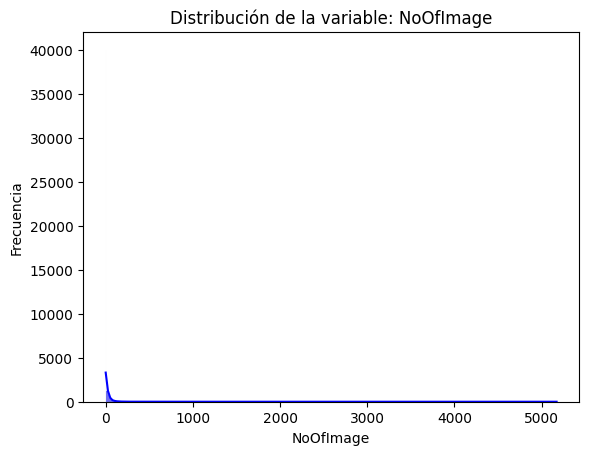

In [9]:
# 6. Histogramas de variables importantes
variables_importantes = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'NoOfImage']
for var in variables_importantes:
    plt.figure()
    sns.histplot(df_train[var], kde=True, color="blue")
    plt.title(f"Distribución de la variable: {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

In [10]:
# Verificar duplicados en el DataFrame
duplicados = df_train.duplicated()
print(f"Cantidad de filas duplicadas: {duplicados.sum()}")

# Mostrar las filas duplicadas
filas_duplicadas = df_train[duplicados]
print(filas_duplicadas)

Cantidad de filas duplicadas: 0
Empty DataFrame
Columns: [URLLength, DomainLength, IsDomainIP, TLD, URLSimilarityIndex, CharContinuationRate, TLDLegitimateProb, URLCharProb, TLDLength, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, NoOfLettersInURL, LetterRatioInURL, NoOfDegitsInURL, DegitRatioInURL, NoOfEqualsInURL, NoOfQMarkInURL, NoOfAmpersandInURL, NoOfOtherSpecialCharsInURL, SpacialCharRatioInURL, IsHTTPS, LineOfCode, LargestLineLength, HasTitle, DomainTitleMatchScore, URLTitleMatchScore, HasFavicon, Robots, IsResponsive, NoOfURLRedirect, NoOfSelfRedirect, HasDescription, NoOfPopup, NoOfiFrame, HasExternalFormSubmit, HasSocialNet, HasSubmitButton, HasHiddenFields, HasPasswordField, Bank, Pay, Crypto, HasCopyrightInfo, NoOfImage, NoOfCSS, NoOfJS, NoOfSelfRef, NoOfEmptyRef, NoOfExternalRef, label]
Index: []

[0 rows x 52 columns]


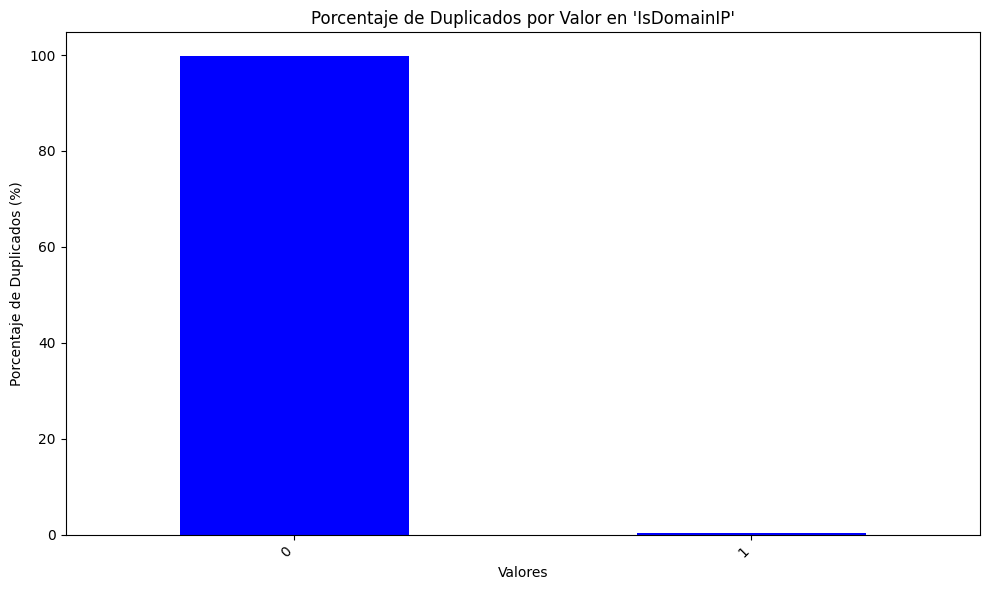

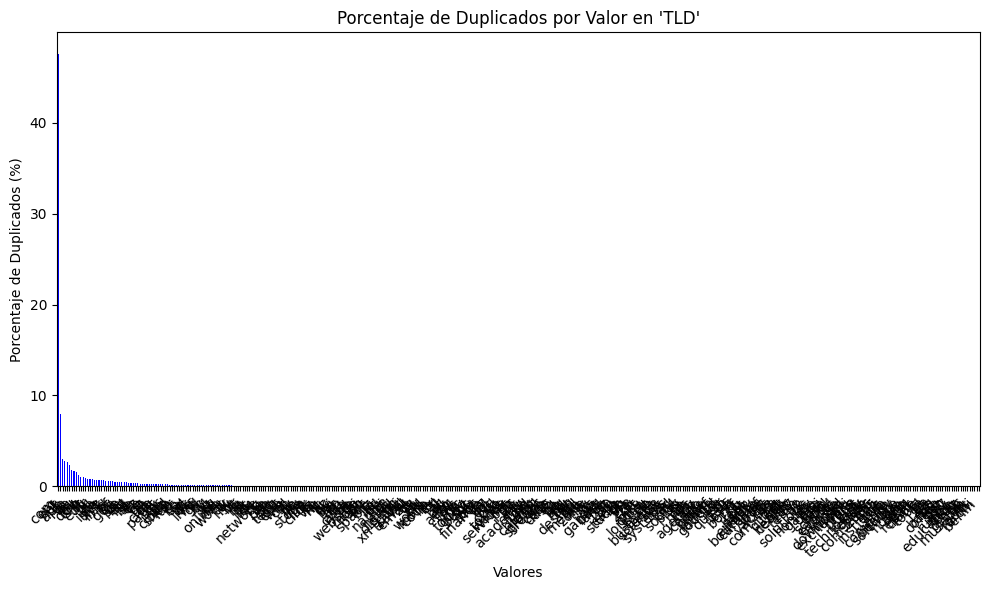

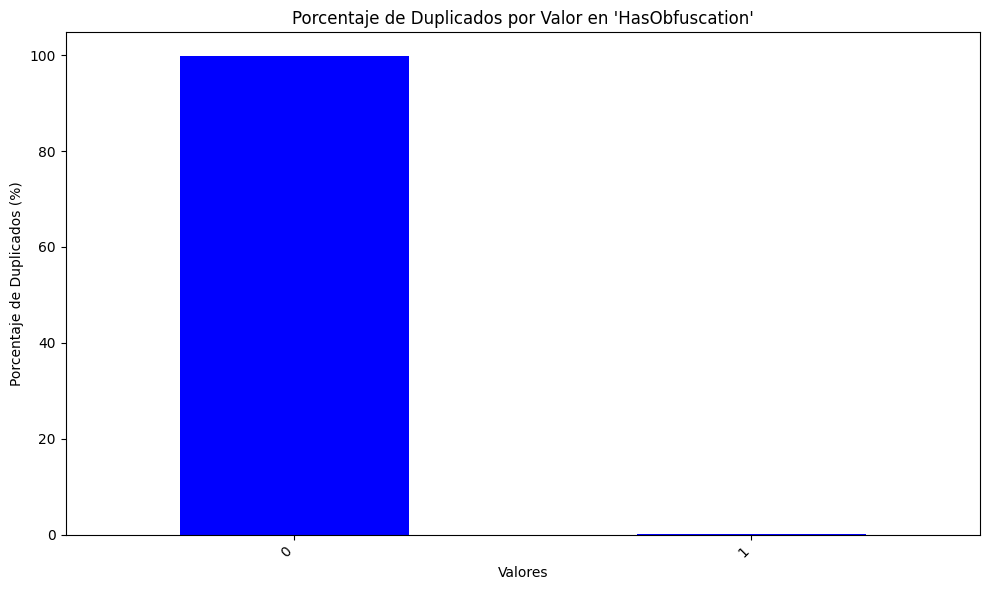

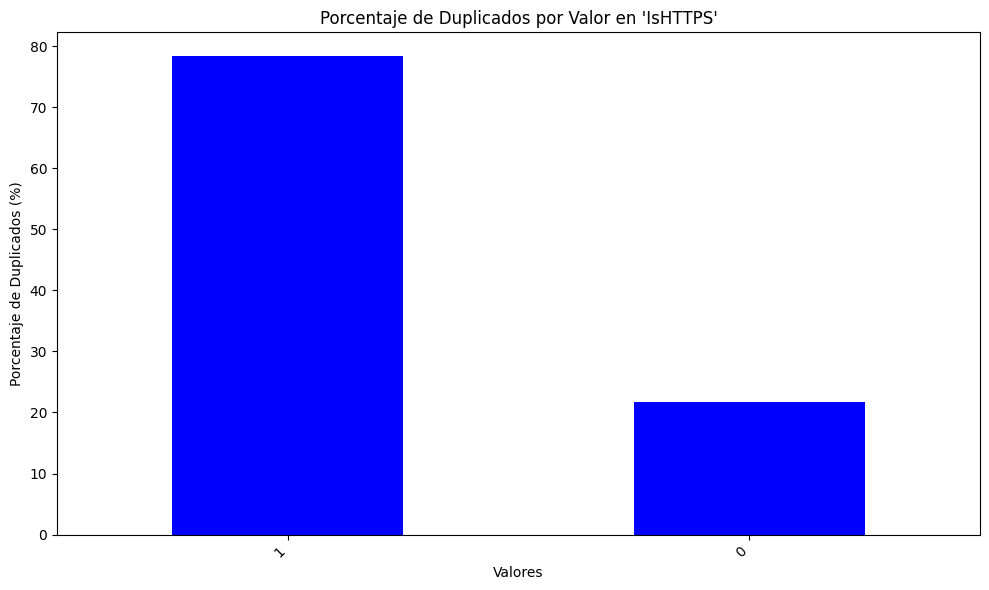

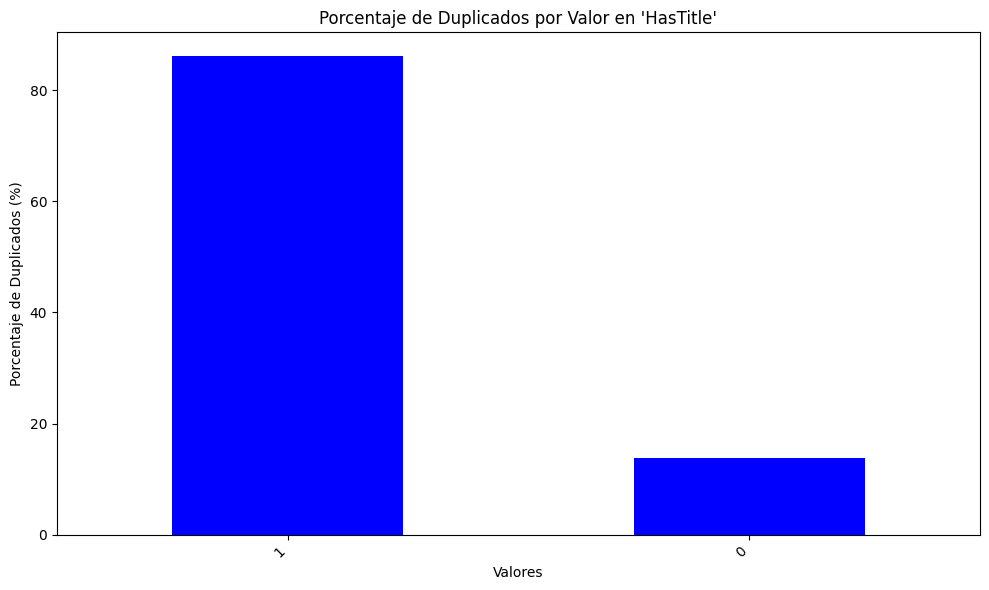

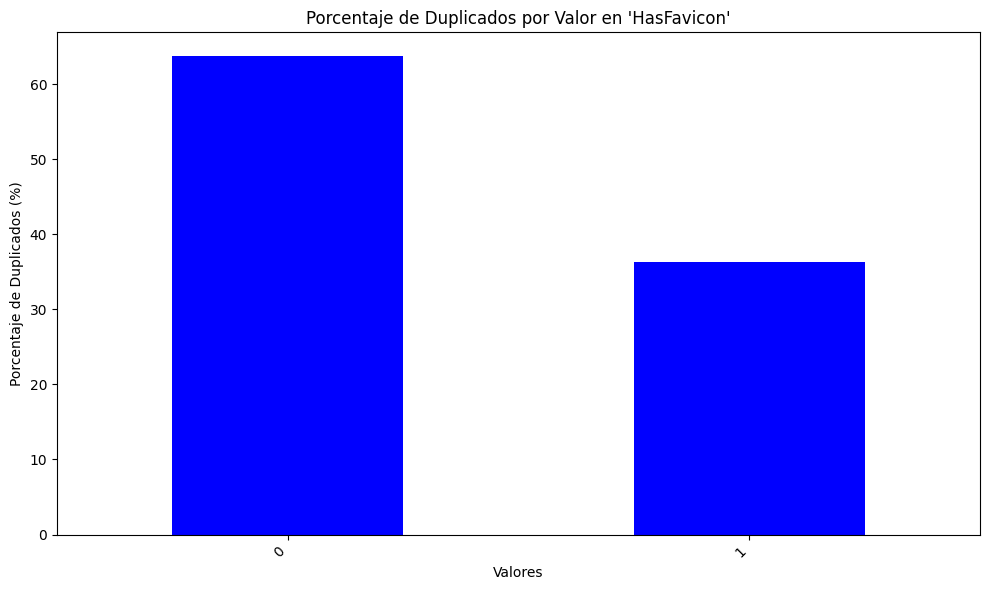

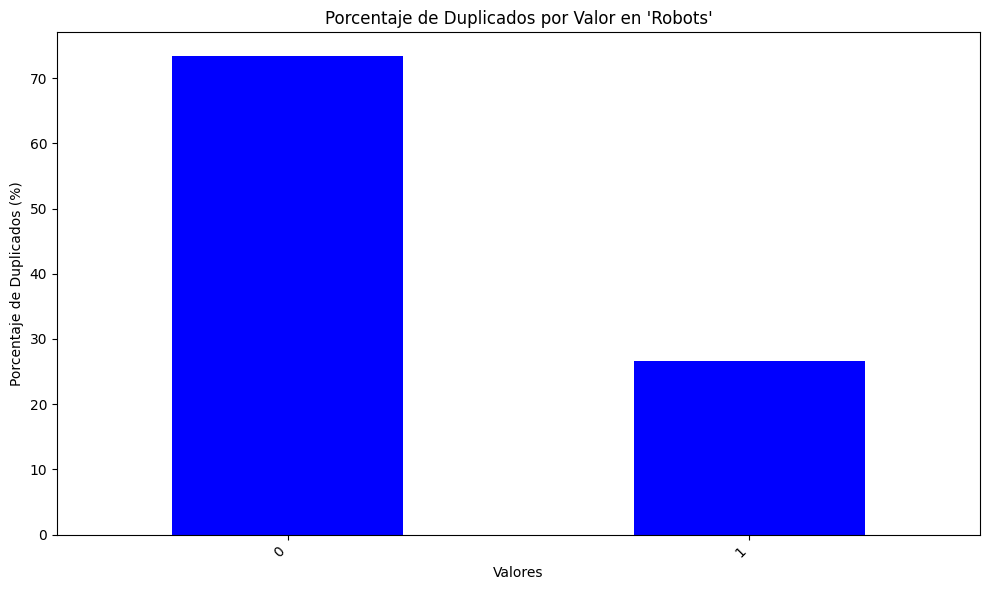

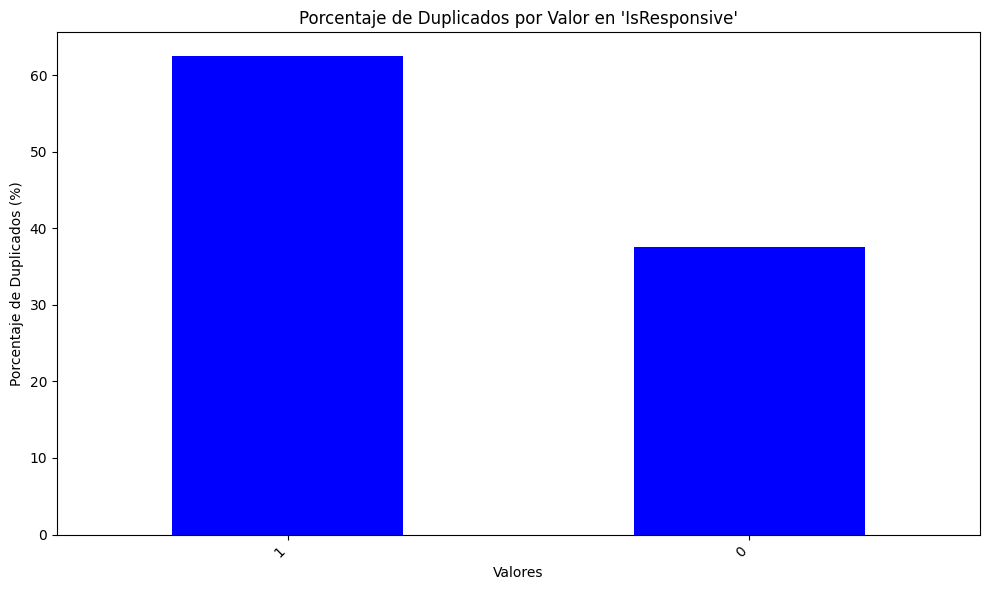

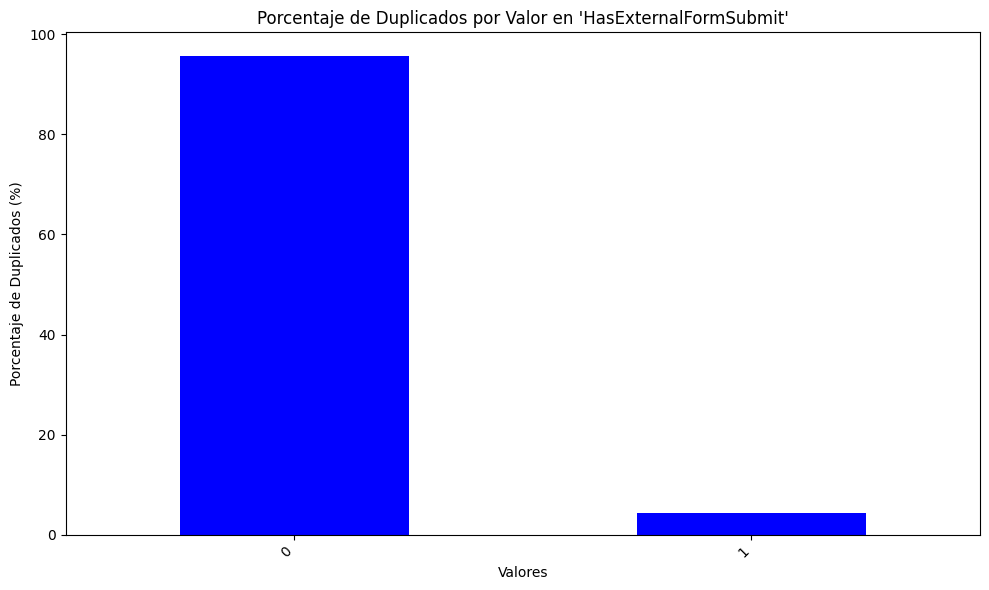

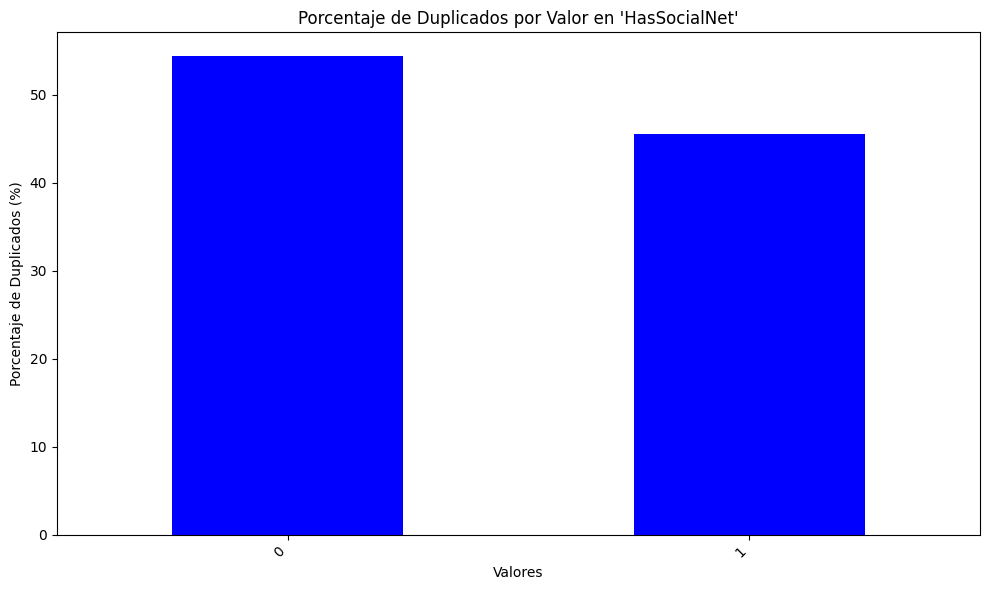

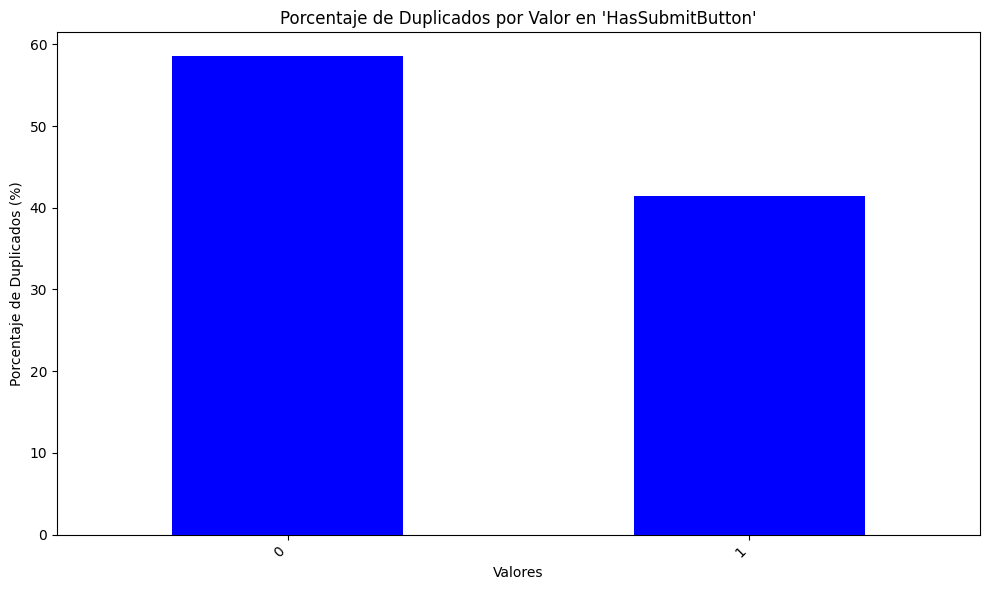

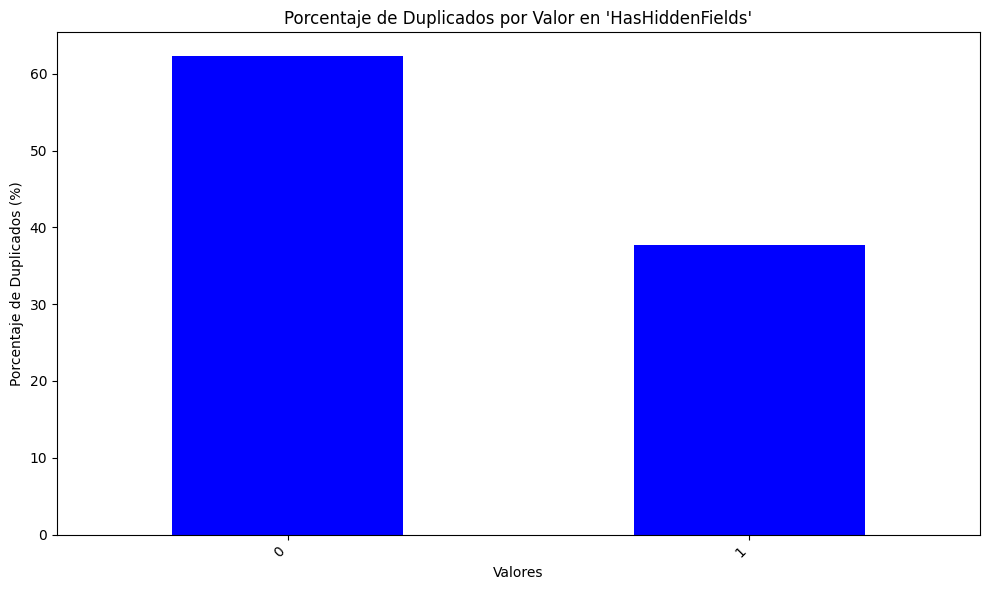

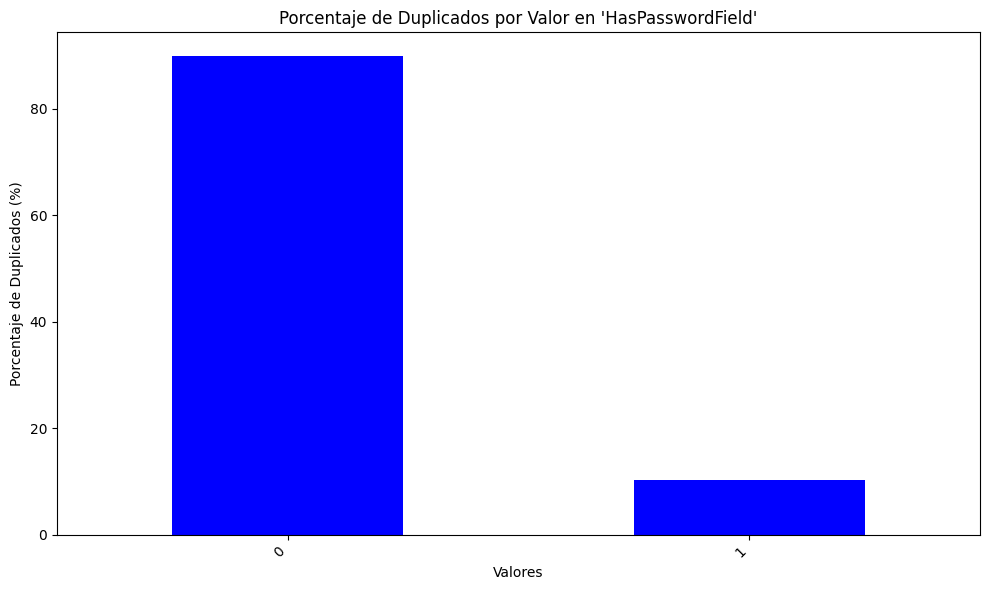

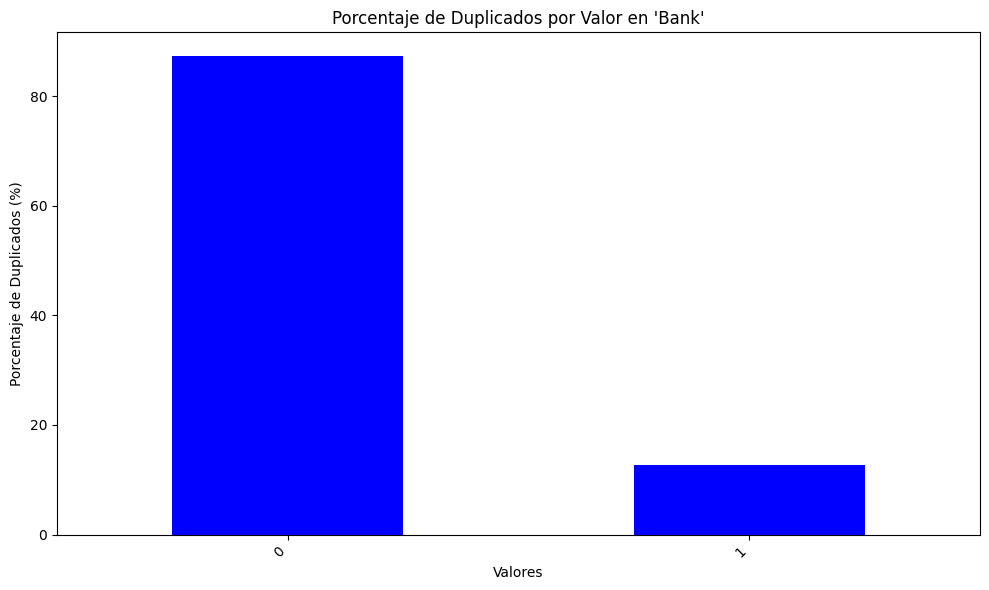

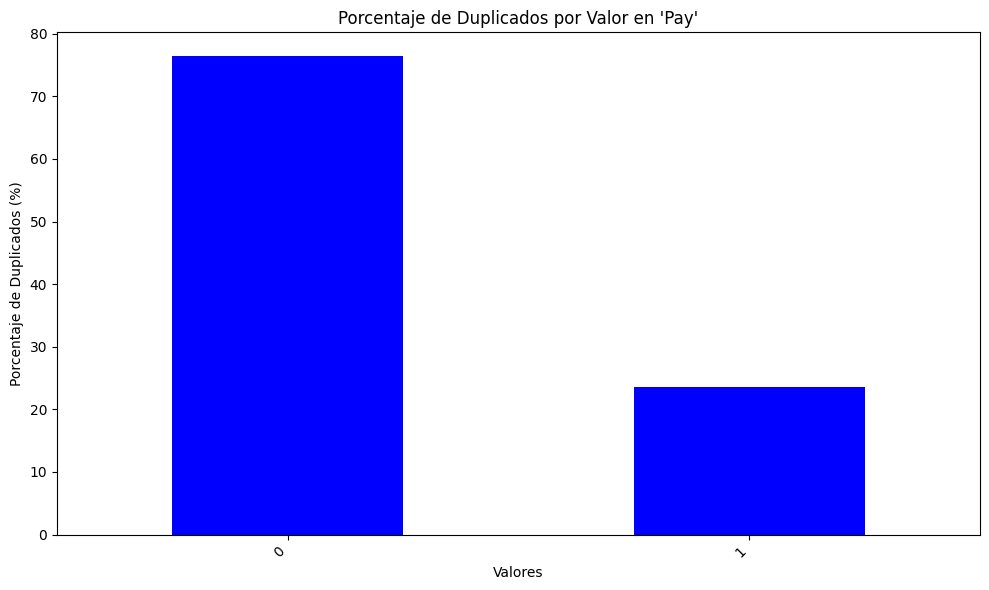

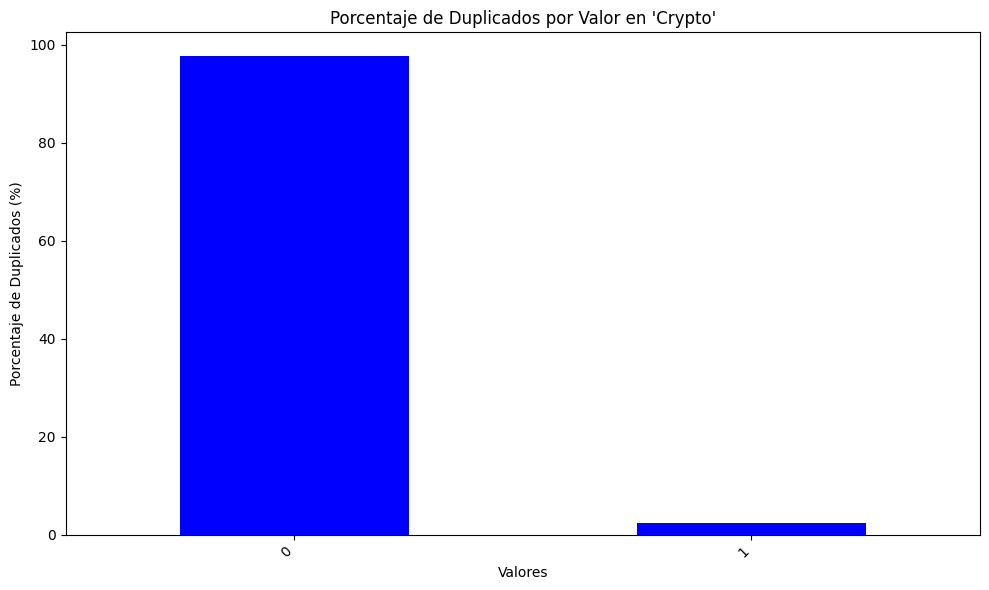

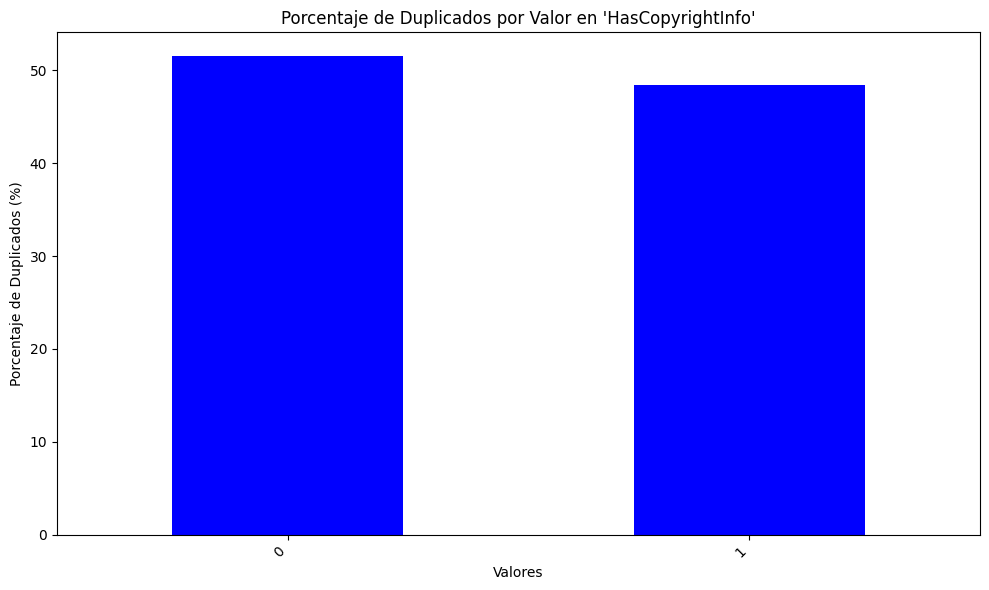

In [11]:
import matplotlib.pyplot as plt

# Lista de columnas relevantes
columnas_revisar = [
    'IsDomainIP', 'TLD', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
    'Robots', 'IsResponsive', 'HasExternalFormSubmit', 'HasSocialNet',
    'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank',
    'Pay', 'Crypto', 'HasCopyrightInfo'
]

# Crear un diccionario para almacenar los resultados
duplicados_por_columna = {}

# Calcular el porcentaje de duplicados para cada valor en cada columna relevante
for column in columnas_revisar:
    columna = df_train[column]
    duplicados_por_valor = columna.value_counts() - 1  # Restar 1 para excluir la primera ocurrencia
    porcentaje_duplicados = (duplicados_por_valor / len(columna)) * 100
    duplicados_por_columna[column] = porcentaje_duplicados[duplicados_por_valor > 0]

# Graficar los resultados
for column, duplicados in duplicados_por_columna.items():
    if not duplicados.empty:  # Solo graficar si hay duplicados
        plt.figure(figsize=(10, 6))
        duplicados.sort_values(ascending=False).plot(kind='bar', color='blue')
        plt.title(f"Porcentaje de Duplicados por Valor en '{column}'")
        plt.xlabel("Valores")
        plt.ylabel("Porcentaje de Duplicados (%)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Distribución Variable Objetivo

C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\386917876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='viridis')


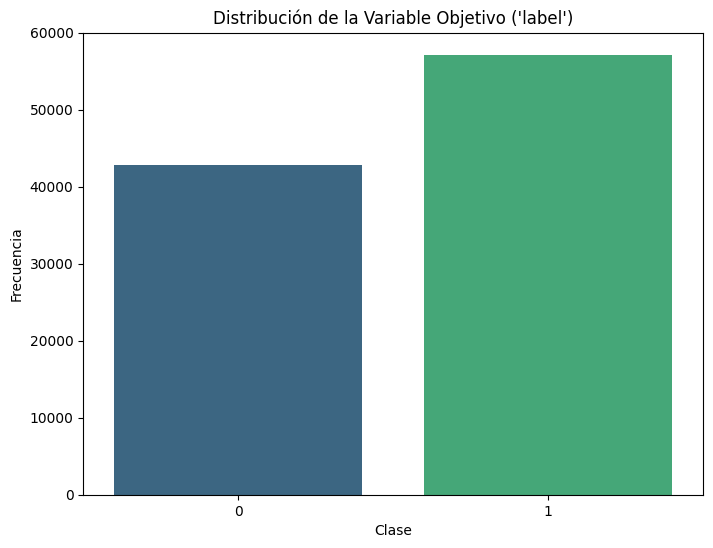

Distribución porcentual de la variable objetivo:
1    57.153
0    42.847
Name: label, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
label_distribution = df_train['label'].value_counts(normalize=True)

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title("Distribución de la Variable Objetivo ('label')")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

print("Distribución porcentual de la variable objetivo:")
print(label_distribution * 100)


## Relacion entre var obj y variables

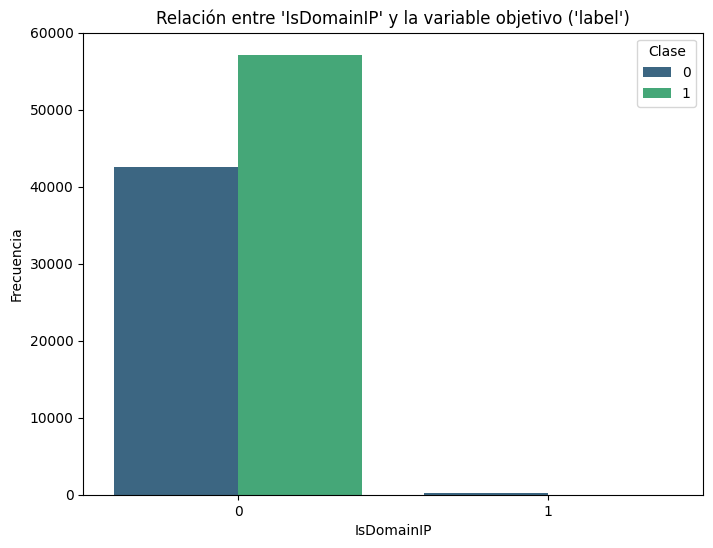

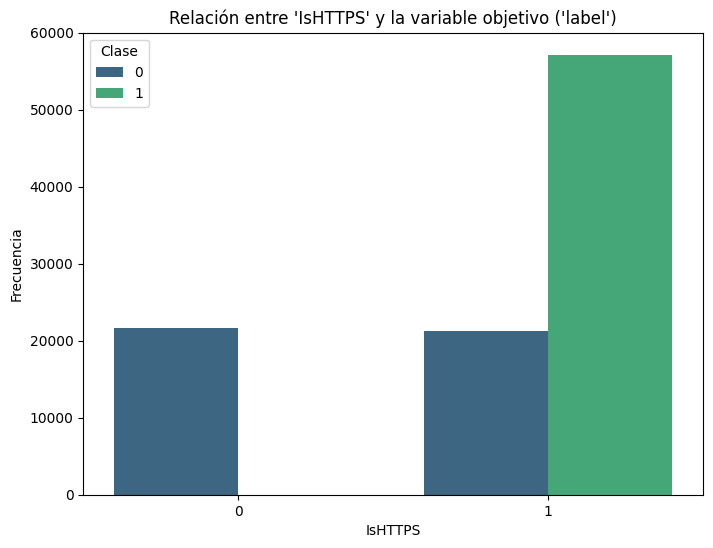

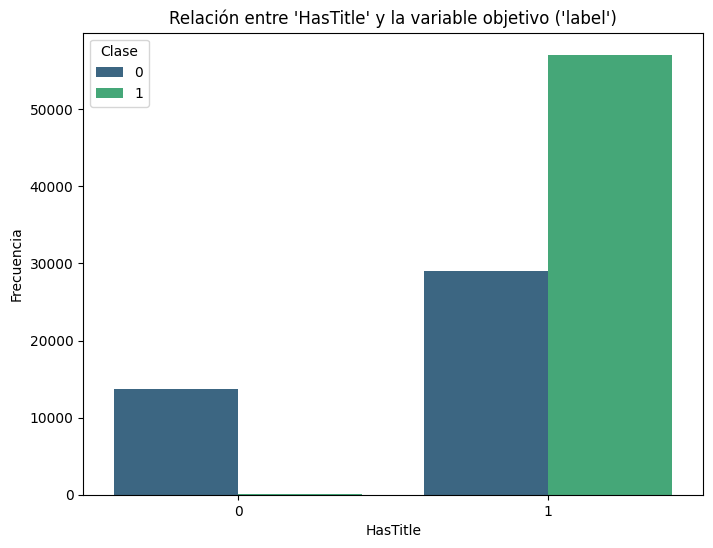

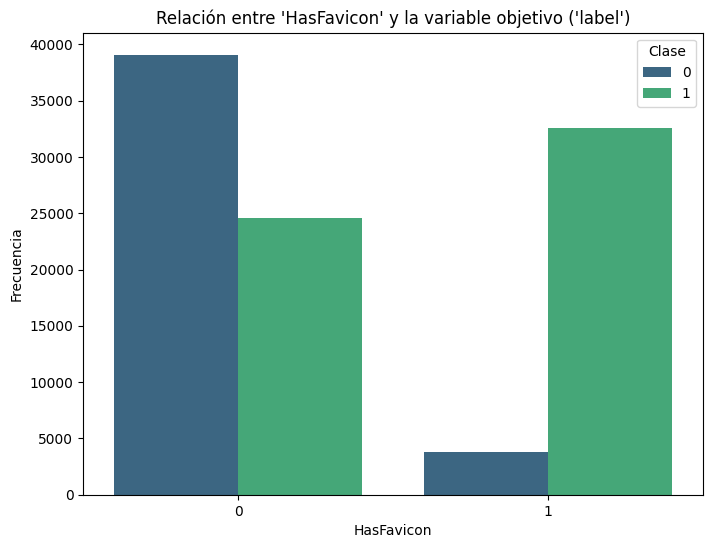

In [13]:
# Relación de variables categóricas con la variable objetivo
categorical_features = ['IsDomainIP', 'IsHTTPS', 'HasTitle', 'HasFavicon']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='label', data=df_train, palette='viridis')
    plt.title(f"Relación entre '{feature}' y la variable objetivo ('label')")
    plt.xlabel(feature)
    plt.ylabel("Frecuencia")
    plt.legend(title="Clase")
    plt.show()


# Outliers

C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\785377887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis')


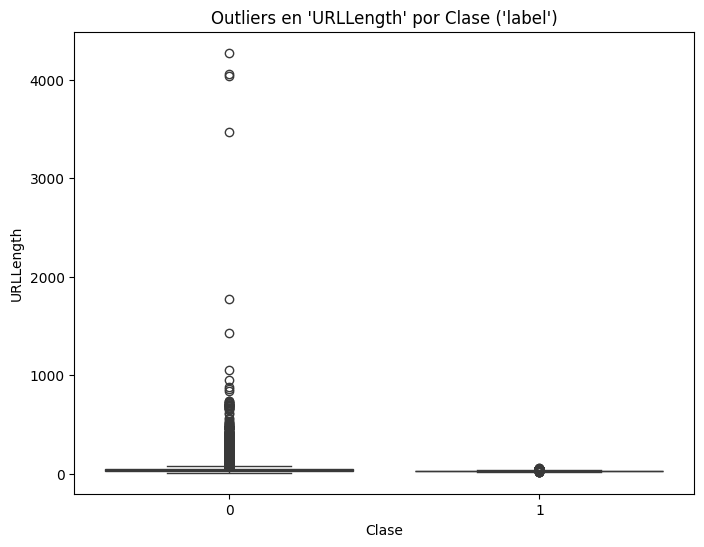

C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\785377887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis')


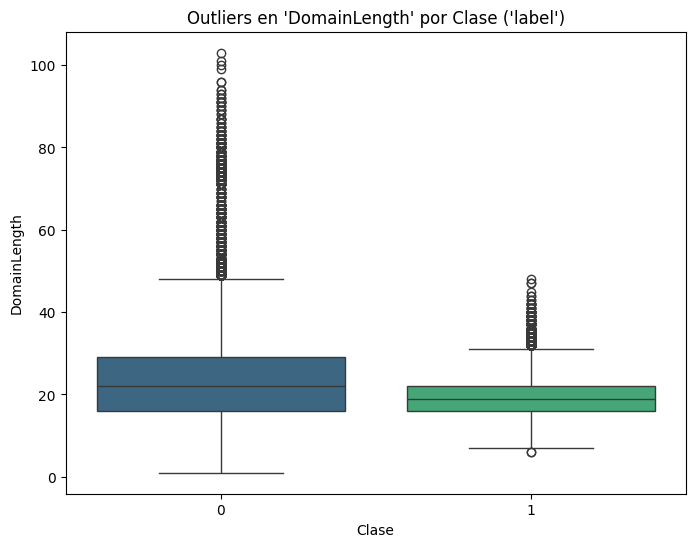

C:\Users\lunit\AppData\Local\Temp\ipykernel_21160\785377887.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=df_train, palette='viridis')


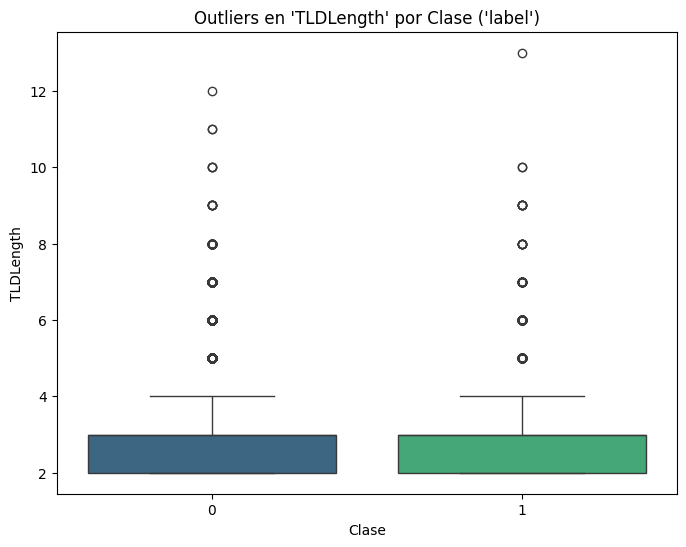

In [14]:
# Identificar outliers con boxplots
numerical_features = ['URLLength', 'DomainLength', 'TLDLength']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='label', y=feature, data=df_train, palette='viridis')
    plt.title(f"Outliers en '{feature}' por Clase ('label')")
    plt.xlabel("Clase")
    plt.ylabel(feature)
    plt.show()
